In [198]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [199]:
# question1
data = pd.read_csv('Instagram-Reach.csv')
null_values = data.isnull().sum()
column_info = data.info()
descriptive_stats = data.describe()

null_values, column_info, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


(Date               0
 Instagram reach    0
 dtype: int64,
 None,
        Instagram reach
 count       365.000000
 mean      50474.712329
 std       30051.787552
 min        7620.000000
 25%       25070.000000
 50%       43987.000000
 75%       68331.000000
 max      161998.000000)

In [200]:
# question2
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date               datetime64[ns]
Instagram reach             int64
dtype: object

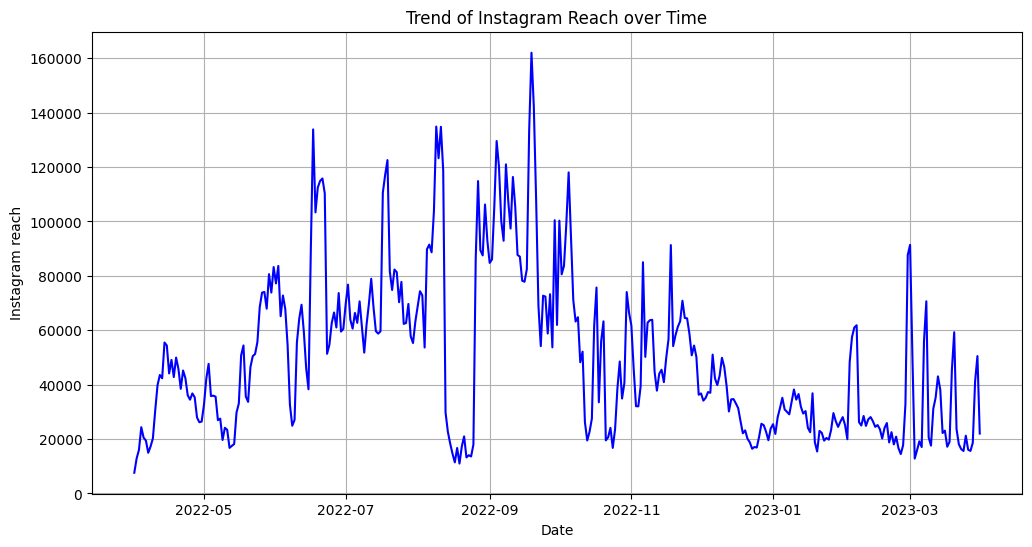

In [201]:

# question3
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Instagram reach'], color='blue')
plt.title('Trend of Instagram Reach over Time')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.grid(True)
plt.show()

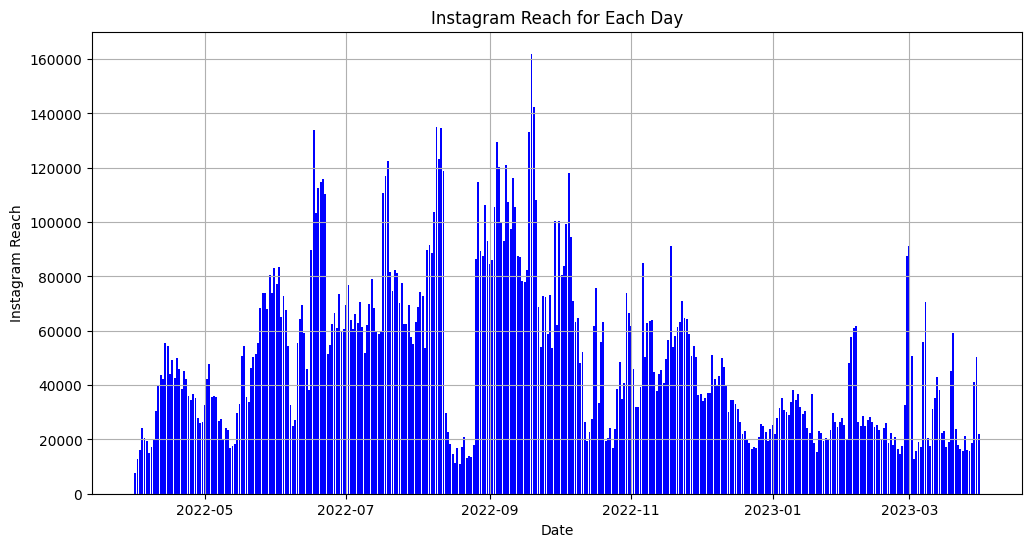

In [202]:

# question4
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Instagram reach'], color='blue')
plt.title('Instagram Reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()


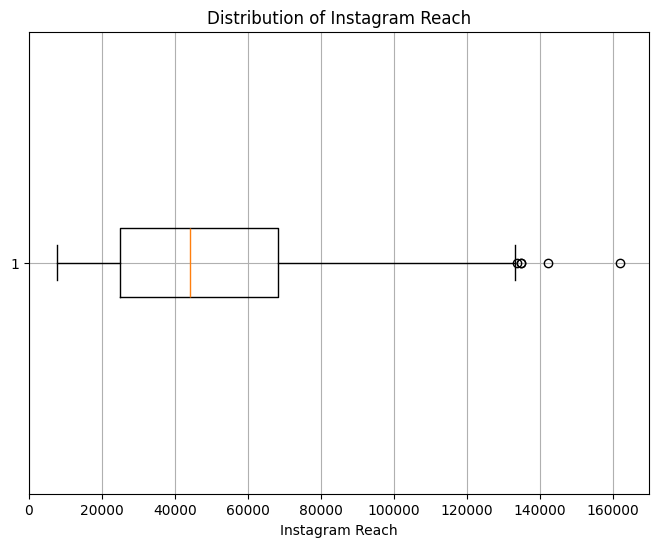

In [203]:

# question5
plt.figure(figsize=(8,6))
plt.boxplot(data['Instagram reach'], vert=(False))
plt.title('Distribution of Instagram Reach')
plt.xlabel('Instagram Reach')
plt.grid(True)
plt.show()

data['Day'] = data['Date'].dt.day_name()

In [204]:

# question6
reach_by_day = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

reach_by_day

,mean,median,std
Day,,,
Monday,52621.692308,46853.0,32296.071347
Tuesday,54030.557692,48786.0,32503.726482
Wednesday,51017.269231,42320.5,29047.869685
Thursday,48570.923077,39150.0,28623.220625
Friday,46666.849057,35574.0,29856.943036
Saturday,47374.750000,40012.0,27667.043634
Sunday,53114.173077,47797.0,30906.162384


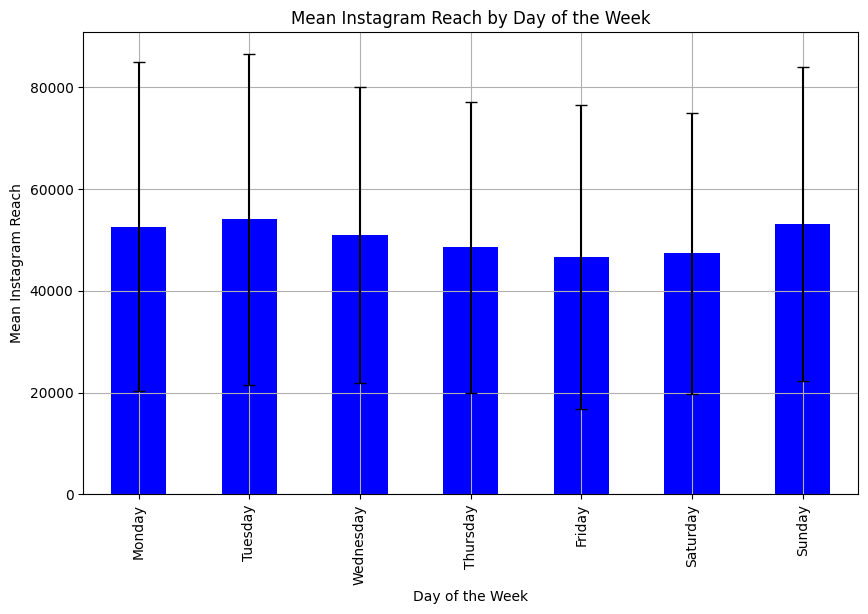

In [205]:

# question7
plt.figure(figsize=(10, 6))
reach_by_day['mean'].plot(kind='bar', color='blue', yerr=reach_by_day['std'], capsize=4)
plt.title('Mean Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Instagram Reach')
plt.grid(True)
plt.show()


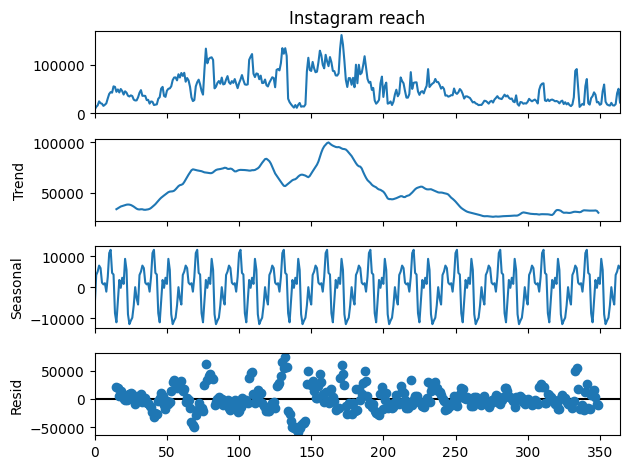

In [206]:

# question8
result = seasonal_decompose(data['Instagram reach'], model='additive', period=30)
result.plot()
plt.show()

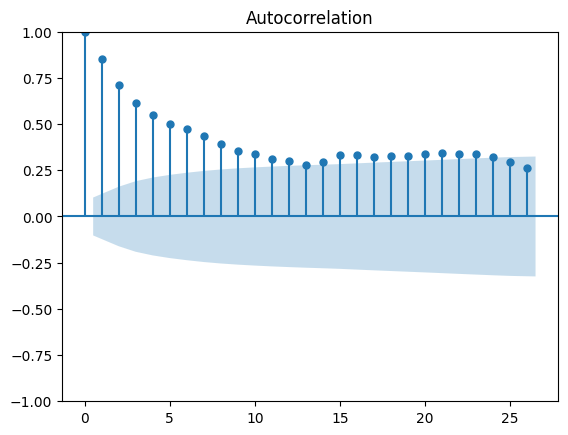

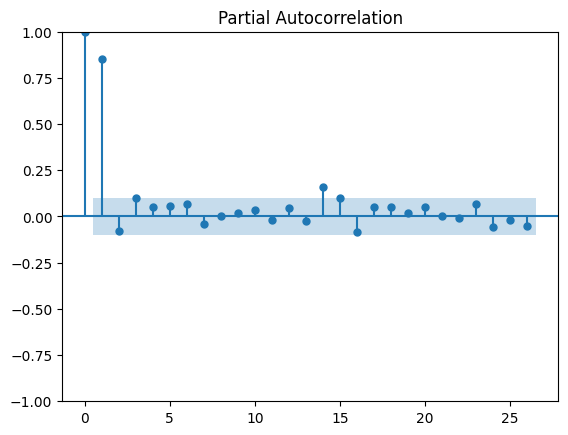

In [207]:

# question9

plot_acf(data['Instagram reach'])
plot_pacf(data['Instagram reach'])
plt.show()

In [208]:

# question10
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Instagram reach'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=30)
forecast


365    15314.408233
366    10252.938517
367    13900.754088
368    18425.612198
369    25124.810015
370    35627.255123
371    40091.168832
372    23013.753138
373    24073.800091
374    20425.951231
375    17328.027234
376    21829.337868
377    23792.905901
378    20276.347994
379    22659.000005
380    19528.657636
381    25199.809879
382    29018.217712
383    24329.147334
384    13731.244595
385    12446.101994
386    13140.108604
387    14400.594256
388    18711.093732
389    15970.509579
390    14317.660496
391    20803.286220
392    27903.826520
393    37333.656437
394    30545.314255
Name: predicted_mean, dtype: float64